In [2]:
import statsmodels.api as sm       
from statsmodels.formula.api import ols, logit

In [5]:
iq = pd.read_excel('iqsize.xlsx')

<IPython.core.display.Javascript object>

In [32]:
iq.shape

(38, 4)

### Data Description

In [7]:
iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       38 non-null     int64  
 1   x1      38 non-null     float64
 2   x2      38 non-null     float64
 3   x3      38 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


In [8]:
iq.describe()

,y,x1,x2,x3
count,38.000000,38.000000,38.000000,38.000000
mean,111.342105,90.675789,68.421053,151.052632
std,22.597867,7.256279,3.993790,23.478509
min,72.000000,79.060000,62.000000,106.000000
25%,89.250000,85.485000,66.000000,135.250000
50%,115.000000,90.540000,68.000000,146.500000
75%,128.000000,94.955000,70.375000,172.000000
max,150.000000,107.950000,77.000000,192.000000


<IPython.core.display.Javascript object>

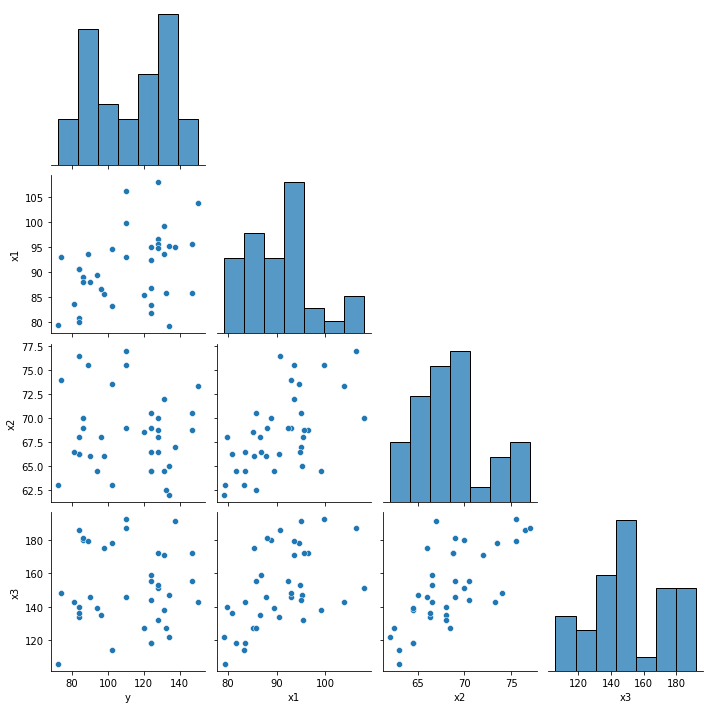

In [9]:
sns.pairplot(data = iq,corner = True)

### Correlation

In [12]:
corr = iq.corr()
corr

,y,x1,x2,x3
y,1.000000,0.377815,-0.093156,0.002512
x1,0.377815,1.000000,0.588367,0.513487
x2,-0.093156,0.588367,1.000000,0.699614
x3,0.002512,0.513487,0.699614,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

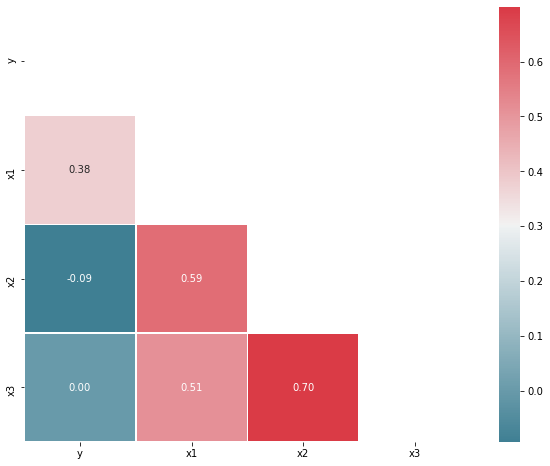

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr,cmap = colormap, linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)


__RESULT__ : <br>
There is a positve correllation between y and $x_1$ there is no strong relationship between the other variables.<br>

Considering $α_E$ = 0.15 and $α_R$ = 0.15. <br>

### Fitting the regression model with predictor $x_2$

In [18]:
formula1 = "y ~ x1"
formula2 = "y ~ x2"
formula3 = "y ~ x3"


In [21]:
mlr = ols(formula3,data = cm)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                 0.0002272
Date:                Tue, 15 Jun 2021   Prob (F-statistic):              0.988
Time:                        17:23:15   Log-Likelihood:                -171.89
No. Observations:                  38   AIC:                             347.8
Df Residuals:                      36   BIC:                             351.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    110.9769     24.514      4.527      0.0

In [28]:
formula1 = "y ~ x1+x2"
formula2 = "y ~ x1+x3"

In [29]:
mlr = ols(formula1,data = cm)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.321
Date:                Tue, 15 Jun 2021   Prob (F-statistic):            0.00221
Time:                        17:40:11   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             336.5
Df Residuals:                      35   BIC:                             341.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.2757     55.867      1.992      0.0

In [30]:
formula1 = "y ~ x1+x2+x3"

In [31]:
mlr = ols(formula1,data = cm)
estimates = mlr.fit()
print(estimates.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Tue, 15 Jun 2021   Prob (F-statistic):            0.00722
Time:                        17:42:06   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.0